# No Balancing: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

<br>

---

<br>

## Baseline
<br>

In [3]:
X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [4]:
y.value_counts(normalize=True)

N    0.863991
Y    0.136009
Name: spam, dtype: float64

<br>
<br>

---

<br>
<br>

## Models
<br>

In [5]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

<br>

### Logistic Regression

In [6]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_cv, y_train)
print('train score:',lr.score(X_train_cv, y_train), ', test score:',lr.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression(max_iter = 10_000))
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2)),
    'lr__C': [0.25, 0.5, 0.75, 1.0]}
    
gs_lr = GridSearchCV(pipeline, param_grid = parameters)
gs_lr.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_lr.score(X_test, y_test)) - (lr.score(X_test_cv, y_test)),4)}')

train score: 0.9925595238095238 , test score: 0.9244444444444444
The accuracy score with hyperparameter tuning increased by : -0.0089


In [7]:
print('best params : ', gs_lr.best_params_)
print('best estimator : ', gs_lr.best_estimator_)

best params :  {'cv__min_df': 2, 'cv__ngram_range': (1, 1), 'lr__C': 1.0}
best estimator :  Pipeline(steps=[('cv', CountVectorizer(min_df=2, stop_words='english')),
                ('lr', LogisticRegression(max_iter=10000))])


Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.99      0.95       194
           Y       0.88      0.45      0.60        31

    accuracy                           0.92       225
   macro avg       0.90      0.72      0.77       225
weighted avg       0.91      0.92      0.90       225



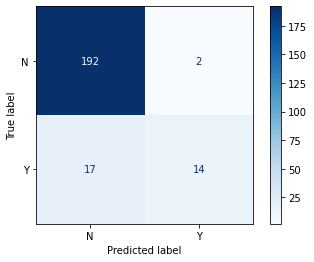

In [8]:
cr_lr = classification_report(y_test, gs_lr.predict(X_test))
print("Classification Report:")
print(cr_lr)

ConfusionMatrixDisplay.from_estimator(gs_lr, X_test, y_test, cmap='Blues');

<br>
<br>

---

<br>
<br>

### Random Forest Classifier

In [9]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_cv, y_train)
print('train score:',rfc.score(X_train_cv, y_train), ', test score:',rfc.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('rfc', RandomForestClassifier(random_state=42))
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2)),
    'rfc__n_estimators': (300, 500),
    'rfc__max_depth': (None, 3, 5),
    'rfc__min_samples_leaf': (1, 3)
}
    
gs_rfc = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_rfc.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_rfc.score(X_test, y_test)) - (rfc.score(X_test_cv, y_test)),4)}')

train score: 1.0 , test score: 0.9066666666666666
The accuracy score with hyperparameter tuning increased by : 0.0267


In [10]:
print('best params : ', gs_rfc.best_params_)
print('best estimator : ', gs_rfc.best_estimator_)

best params :  {'cv__min_df': 3, 'cv__ngram_range': (1, 2), 'rfc__max_depth': None, 'rfc__min_samples_leaf': 1, 'rfc__n_estimators': 300}
best estimator :  Pipeline(steps=[('cv',
                 CountVectorizer(min_df=3, ngram_range=(1, 2),
                                 stop_words='english')),
                ('rfc',
                 RandomForestClassifier(n_estimators=300, random_state=42))])


Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.97      0.96       194
           Y       0.81      0.68      0.74        31

    accuracy                           0.93       225
   macro avg       0.88      0.83      0.85       225
weighted avg       0.93      0.93      0.93       225



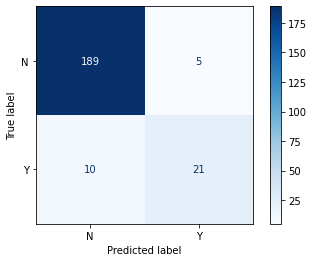

In [11]:
cr_rfc = classification_report(y_test, gs_rfc.predict(X_test))
print("Classification Report:")
print(cr_rfc)

ConfusionMatrixDisplay.from_estimator(gs_rfc, X_test, y_test, cmap='Blues');

<br>
<br>

---

<br>
<br>

### Multinomial Naive Bayes

In [12]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
print('train score:',mnb.score(X_train_cv, y_train), ', test score:',mnb.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('mnb', MultinomialNB())
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'mnb__alpha': [0.01, 0.05, 0.1]
}
    
gs_mnb = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_mnb.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_mnb.score(X_test, y_test)) - (mnb.score(X_test_cv, y_test)),4)}')

train score: 0.9925595238095238 , test score: 0.9288888888888889
The accuracy score with hyperparameter tuning increased by : -0.0044


In [13]:
print('best params : ', gs_mnb.best_params_)
print('best estimator : ', gs_mnb.best_estimator_)

best params :  {'cv__min_df': 1, 'cv__ngram_range': (1, 1), 'mnb__alpha': 0.1}
best estimator :  Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('mnb', MultinomialNB(alpha=0.1))])


Classification Report:
              precision    recall  f1-score   support

           N       0.97      0.94      0.96       194
           Y       0.69      0.81      0.75        31

    accuracy                           0.92       225
   macro avg       0.83      0.87      0.85       225
weighted avg       0.93      0.92      0.93       225



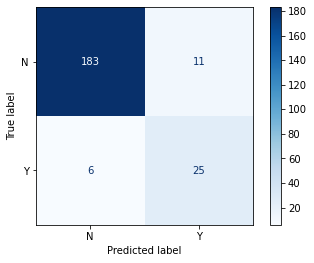

In [14]:
cr_mnb = classification_report(y_test, gs_mnb.predict(X_test))
print("Classification Report:")
print(cr_mnb)

ConfusionMatrixDisplay.from_estimator(gs_mnb, X_test, y_test, cmap='Blues');